In [1]:
# Installing the Backtrader library
!pip install backtrader

     |████████████████████████████████| 419kB 2.8MB/s 


In [2]:
# Importing the required packages
from __future__ import (absolute_import, division, print_function, unicode_literals)

import warnings
warnings.filterwarnings('ignore')

import datetime  # For datetime information
import os.path   # To manage paths
import sys       # To find out the script name (in argv[0])

import backtrader as bt  # Importing the backtrader library 

In [3]:
# Coding the strategy

class RSI_strategy(bt.Strategy):
	params=(('minimum_RSI', 30),('maximum_RSI', 70),('look_back_period', 14))

	def log(self, txt, dt=None):
		dt = dt or self.datas[0].datetime.date(0)
		print('%s, %s' % (dt.isoformat(), txt))

	def __init__(self):
		# RSI indicator
		self.RSI_strategy = bt.indicators.RSI_SMA(self.data.close, period=self.params.look_back_period) 

	def notify_order(self, order):
		if order.status in [order.Submitted, order.Accepted]:
		# Buy/Sell order submitted/accepted to/by broker - Nothing to do
			return

		# Check if an order has been completed
		# Attention: Broker could reject order if not enough cash
		if order.status in [order.Completed]:
			if order.isbuy():
				self.log('BUY EXECUTED, %.2f' % order.executed.price)
			elif order.issell():
				self.log('SELL EXECUTED, %.2f' % order.executed.price) 

			self.bar_executed = len(self)

		elif order.status in [order.Canceled, order.Margin, order.Rejected]:
			self.log('Order Cancelled/Margin/Rejected')

		# Write down: no pending order
		self.order = None

	def next(self):

		# Buy if over sold
		if self.RSI_strategy < self.params.minimum_RSI:
			self.buy()

		# Sell if over buyed
		if self.RSI_strategy > self.params.maximum_RSI:
			self.close() 

Starting Portfolio Value: 10000.00
2018-02-05, BUY EXECUTED, 38.34
2018-02-06, BUY EXECUTED, 37.31
2018-02-07, Order Cancelled/Margin/Rejected
2018-02-08, Order Cancelled/Margin/Rejected
2018-02-09, Order Cancelled/Margin/Rejected
2018-02-12, Order Cancelled/Margin/Rejected
2018-02-27, SELL EXECUTED, 43.34
2018-03-26, BUY EXECUTED, 40.67
2018-04-03, BUY EXECUTED, 40.56
2018-04-19, SELL EXECUTED, 42.05
2018-06-25, BUY EXECUTED, 44.55
2018-06-26, BUY EXECUTED, 44.45
2018-06-27, Order Cancelled/Margin/Rejected
2018-06-28, Order Cancelled/Margin/Rejected
2018-07-25, SELL EXECUTED, 46.90
2018-11-15, BUY EXECUTED, 46.08
2018-11-21, BUY EXECUTED, 43.96
2018-11-23, Order Cancelled/Margin/Rejected
2018-11-26, Order Cancelled/Margin/Rejected
2018-11-27, Order Cancelled/Margin/Rejected
2018-11-28, Order Cancelled/Margin/Rejected
2018-11-29, Order Cancelled/Margin/Rejected
2018-11-30, Order Cancelled/Margin/Rejected
2018-12-03, Order Cancelled/Margin/Rejected
2018-12-11, Order Cancelled/Margin/Rej

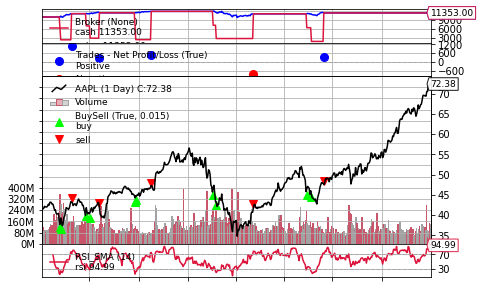

In [5]:
# RSI - Relative Strength Index Indicator

if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add a strategy
    cerebro.addstrategy(RSI_strategy)

        # Create a Data Feed
    data = bt.feeds.YahooFinanceData(
        dataname='AAPL',
        fromdate=datetime.datetime(2018, 1, 1),
        # Do not pass values before this date
        todate=datetime.datetime(2019, 12, 31),
        # Do not pass values after this date
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(10000.0)

    # Add a FixedSize sizer according to the stake
    cerebro.addsizer(bt.sizers.FixedSize, stake=100)

    # Set the commission
    cerebro.broker.setcommission(commission=0.0)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Plot the result
    cerebro.plot(iplot = False)